# Q3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

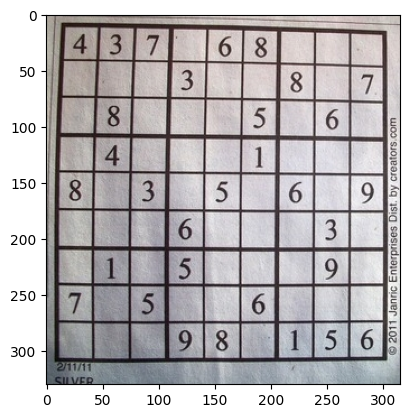

In [2]:
# Read the image
### YOUR CODE ###
img = imread('q3.jpg')
plt.imshow(img)

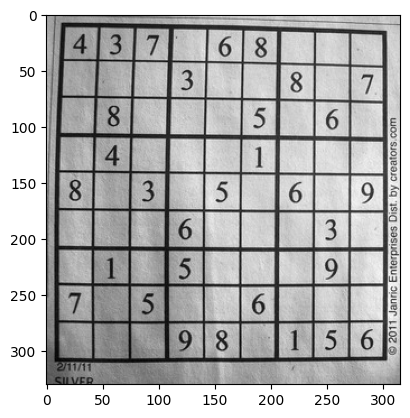

In [3]:
# Show the grayscale image
gray_img = rgb2gray(img)
plt.imshow(gray_img, cmap='gray')

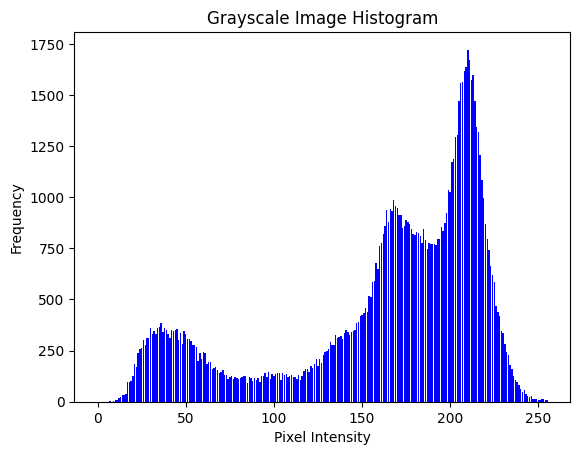

In [5]:
# generate and show histogram of grayscale image

# Create histogram of gray scale image
hist = np.zeros(256, dtype=np.uint32)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        hist[int(np.round(gray_img[i, j] * 255))] += 1

# Plot the histogram
plt.bar(range(256), hist, color='blue')

# Labels and title
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Grayscale Image Histogram')

# Show plot
plt.show()

In [6]:
def threshold_otsu_impl(image, nbins=0.1):
    
    """
    For this method, do not use any pre-built methods for Otsu's thresholding 
    (such as cv2.otsu or skimage). Implement it using numpy.

    Parameters:
    - image (ndarray): A grayscale image represented as a 2D NumPy array.
    - nbins (float): The step size used to iterate through possible threshold values.
    
    Returns:
    - least_variance_threshold (float): The optimal threshold that minimizes the within-class variance.
    """

    least_variance_threshold = 0
    least_variance = np.inf
    threshold = 0
    while(threshold <= 1):
        group1 = image[image <= threshold]
        group2 = image[image > threshold]
        var1 = np.var(group1)
        var2 = np.var(group2)
        var = (len(group1)*var1 + len(group2)*var2)/(len(image))
        if var < least_variance:
            least_variance_threshold = threshold
            least_variance = var
        threshold += nbins     
    
    return least_variance_threshold

0.5


e:\CV\CV\lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
e:\CV\CV\lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
e:\CV\CV\lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


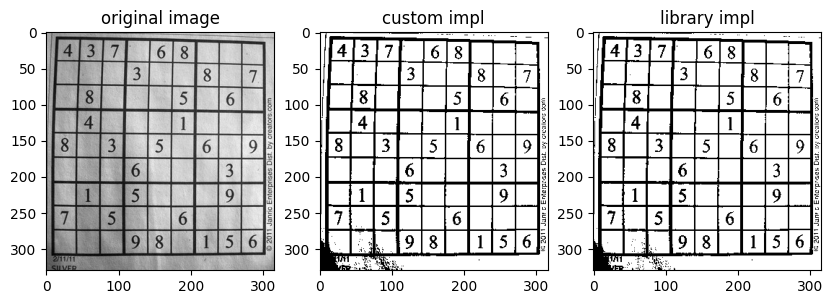

In [7]:
# Do not change this cell
# thresholding the image using our custom implementation
threshold_c = threshold_otsu_impl(gray_img)
print(threshold_c)
bin_img_from_custom = gray_img > threshold_c

# thresholding the image using the pre-defiend skimage library implementation
threshold_s = threshold_otsu(gray_img)
bin_img_from_lib = gray_img > threshold_s

fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].set_title("original image")
ax[0].imshow(gray_img, cmap="gray")

ax[1].set_title("custom impl")
ax[1].imshow(bin_img_from_custom, cmap="gray")

ax[2].set_title("library impl")
ax[2].imshow(bin_img_from_lib, cmap="gray")